In [14]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as Transform
import torch.utils.data as DATA
import matplotlib.pyplot as plt
import numpy as np


Q5 Load your model trained at 1.4, let us choose one image from MNIST test images, inference the image, show image and estimate the image as following. 

Please input a integer between 0-9999
222


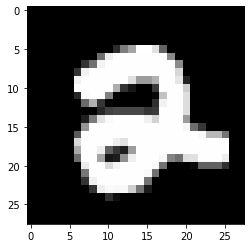

The number you pick from data is 2
Correct! The number is 2


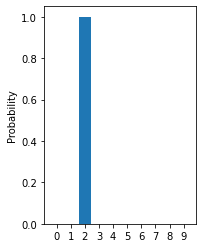

In [40]:
class LeNet5(nn.Module):
    def __init__(self):             # 28*28
        super(LeNet5, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 6, 5, 1, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(2),        # 6@14*14
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, 5, 1, padding=0),
            nn.Sigmoid(),
            nn.AvgPool2d(2),        # 16@5*5
        )
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16*5*5, 120),
            nn.Sigmoid(),
        )
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.Sigmoid(),
        )
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x




def pick_number(model):
  index = int(input('Please input a integer between 0-9999\n'))
  data = torchvision.datasets.MNIST(
      root= "./mnist",
      train=False,
      transform=Transform.ToTensor,
      download=True
  )
  image = data.data[index].numpy()
  plt.imshow(image,cmap='gray')
  plt.show()
  x = data.data[index].view(1,1,28,28).type(torch.float32)/255
  y = data.targets[index]
  print(f"The number you pick from data is {y}")

  out = model(x) # the output of the model with respect to x
  probability = ( np.exp(out.detach().numpy()) ).reshape(10) # softmax and change the output type to 10 dimension
  probability /= sum(probability)
  _, y_hat = torch.max(out, 1) 

  if(y_hat == y ):
    print(f'Correct! The number is {y}')
  else :
    print(f'Incorrect! The correct number is {y}')

    plt.subplot(121)
    plt.xlabel(f'number {y}')
    plt.imshow(np.reshape(x, (28, 28)), cmap='gray')
    
  plt.subplot(122)
  plt.ylabel('Probability')
  x = range(10)
  plt.bar(x, probability)
  plt.xticks(x)
  plt.show()



lenet5 = torch.load('./LeNet5.pkl')
lenet5.eval()
pick_number(lenet5)


